In [1]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
!pip install mglearn
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler
%matplotlib inline

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


k-meansクラスタリング
---
- 最も単純で最も広く用いられているクラスタリングアルゴリズム
- データのある領域を代表するような「クラスタ重心」を見つけようとする
- アルゴリズムは次の2つのステップを繰り返す
    - 個々のデータポイントを最寄りのクラスタ重心に割り当てる
    - 個々のクラスタ重心をその点に割り当てられたデータポイントの平均に設定する

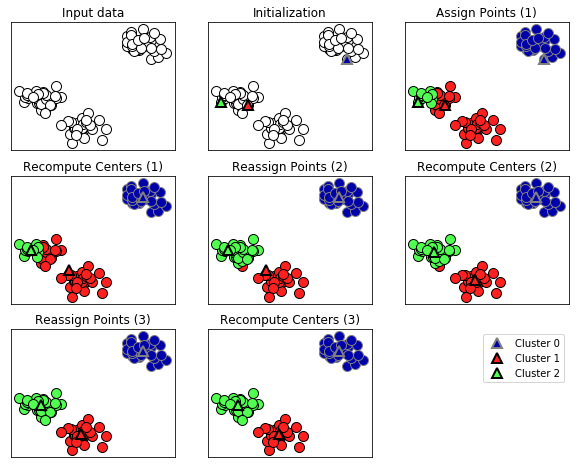

In [2]:
mglearn.plots.plot_kmeans_algorithm()

- データポイントを○クラスタセンタを△で示している
- クラスタセンタの再計算と点の割当を繰り返しクラスタリングしている
- 3度目の再計算でクラスタセンタが動かなくなるためこのアルゴリズムは停止する

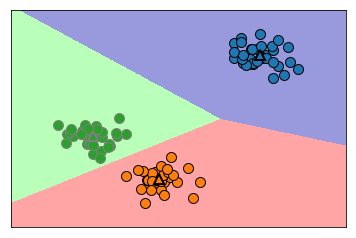

In [3]:
mglearn.plots.plot_kmeans_boundaries()

- k-meansで発見されたクラスタセンタとクラスタ境界

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 合成2次元データを作る
X, y = make_blobs(random_state=1)

# クラスタリングモデルを作る(n_clustersはクラスタの数)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


- アルゴリズムの実行過程で個々の訓練データポイントに対して割り当てられたクラスタラベルは「kmeans.labels_」で確認できる

In [6]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


- predictメソッドをもとに新しいデータポイントにクラスタを割り当てることができる
    - 既存のモデルが変更されることはない

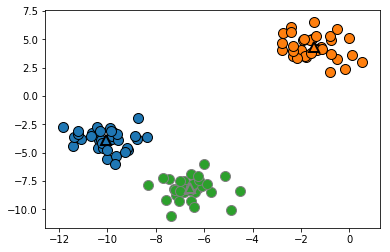

In [7]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                         kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

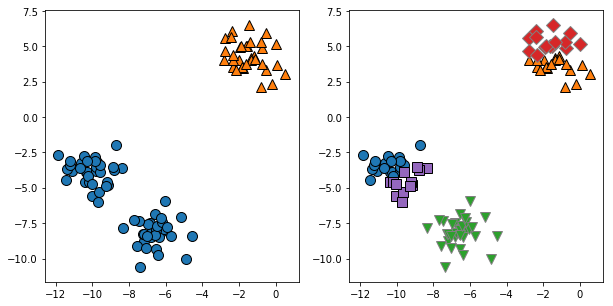

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# クラスタセンタを2つに指定
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# クラスタセンタを5つに指定
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
 

- k-meansで見つけるクラスタ割当の数を2と5に変えてみる

### k-meansがうまくいかない場合
- k-meansは比較的単純な形しか見つけられない
- またk-meansではクラスタ境界をクラスタセンタのちょうど中間にひく

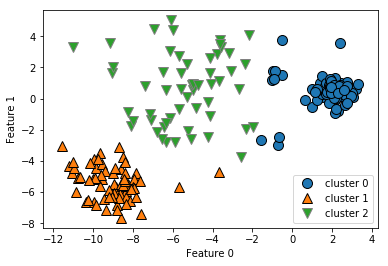

In [9]:
X_varied, y_varied = make_blobs(n_samples=200,
                                  cluster_std=[1.0, 2.5, 0.5],
                                  random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- 普通に考えると左下と右上とそれ以外の中心の3クラスに分類できそう
- しかし、真ん中の方向の一部に他のデータポイントとはかけ離れた位置にあるデータポイントも含まれてしまっている
- これはクラスタセンタの中間に境界を引いているため

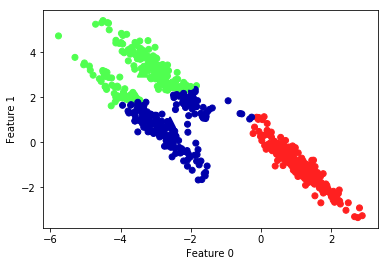

In [10]:
# ランダムにクラスタデータを作成
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 対角線方向に引き伸ばす
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# データポイントを3つにクラスタリング
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# クラスタ割り当てとクラスタセンタをプロット
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
              marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- 明らかに3つに分類できるデータポイントを持つ2次元データセットを対角線上に引き伸ばす
- しかしこのデータポイントはk-meansでは正しく分類ができない
- これは、k-meansは最も近いクラスセンタへの距離しか考慮していないため
- つまり、k-meansでは基本的には円でしかクラス分けを行うことができない

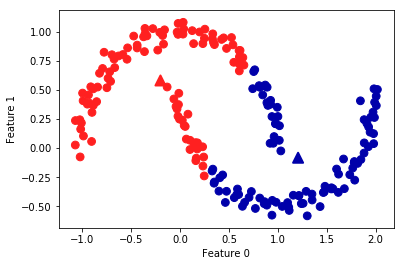

In [11]:
# 合成データセットtwo_moonsデータ作成(今度はノイズ少なめ)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 2つのクラスタにクラスタ分類
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# クラスタ割り当てとクラスタセンタをプロット
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
              marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- 上記のような複雑な形状に対してはうまく機能しない

### ベクトル量子化、もしくは成分分解としてのk-means
- k-meansとPCAやNMFなどの成分分解手法の間には興味深い類似性がある
    - PCAはデータ中にもっとも分散が大きい方向郡を見出そうとする
    - NMFは足しこんでいくことのできる成分を見つけようとしていた
- PCAやNMFなどの手法はデータポイントを風数の成分の和として表現しようとする
- これに対してk-meansはクラスタセンタで個々のデータポイントを表現する
    - 個々のデータポインタをクラスタセンタとして与えられる単一の成分で表現していると考えることができる
- このようにk-meansを単一成分で個々のデータポイントを表現する成分分析手法をしてみる考え方を「ベクトル量子化(vector quantization)」と呼ぶ

### k-meansの特徴
- k-meansは非常によく用いられるクラスタリングアルゴリズム
    - 比較的理解しやすく実装しやすい
    - 比較的高速に実行できる
    - 大規模なデータセットにも適用できる
        - scit-leanではさらに非常に大規模なデータセットを処理できるMIniBatchKMeansも用意されている
- k-meansの欠点の一つは初期化が乱数で行われること
    - これはアルゴリズムの出力が乱数のシードに依存することを意味する
    - scikit-leanではデフォルトで異なる乱数を用いて10回実行し最良の結果を返してくる
- さらにk-meansはクラスタの形に対してかなり成約の強い仮定を置いていることと、探しているクラスタの数をユーザが指定しなくてはならないこと
    - クラスタの数は実世界のアプリケーションではわからないことが多い
    

凝縮型クラスタリング(agglomeratice clustering)
---
- 凝縮型クラスタリングとは、ある原則に基づく一連のクラスタリングアルゴリズム
- 個々のデータポイントをそれぞれ個別のクラスタとして開始し、最も類似した2つのクラスタを併合していく
- これらをなにかの終了条件が満たされるまで繰り返す
    - scikit-learnに実装されている終了条件はクラスタの数
    - 指定した数のクラスタが残るまで似たクラスタを併合し続ける
    
### 最も類似したクラスタを決定する連結度の決定方法
- ward
    - デフォルト。wardは併合した際にクラスタ内の分散の増分が最小になるように２つのクラスタを選択する
- average
    - average連結度を用いるとクラスタ間の全てのポイント間の距離の平均値が最小の2クラスタを併合する
- complete
    - complete連結度(最大連結度とも呼ばれる)は2つのクラスタの点間の距離の最大値と最小となるものを併合する

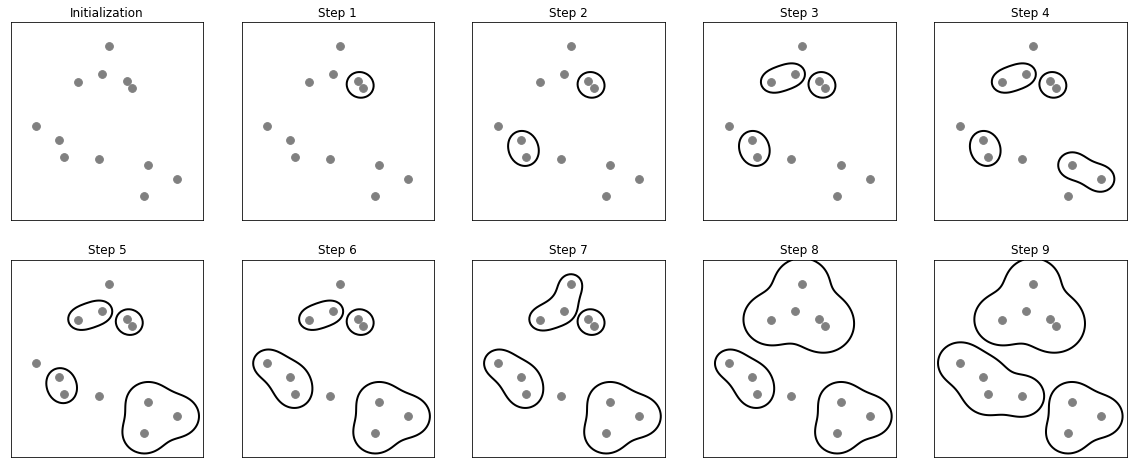

In [12]:
mglearn.plots.plot_agglomerative_algorithm()

- wardを用いた凝縮型クラスタ
- ２つの最も近いクラスタの併合を繰り返す

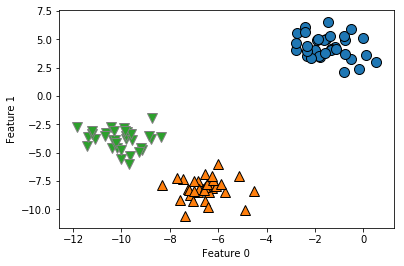

In [13]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 階層型クラスタリングとデンドログラム

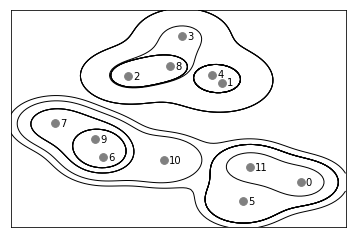

In [14]:
mglearn.plots.plot_agglomerative()

- 凝縮型クラスタリングで生成される階層的なクラスタ割当
- 2次元データしか表現できない

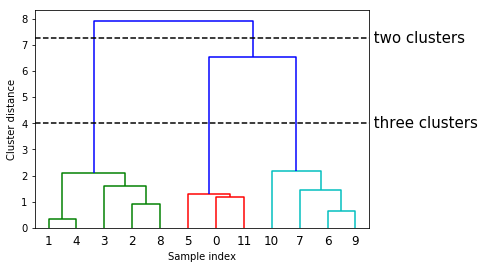

In [15]:
# SciPyからデンドログラム関数とwardクラスタリング関数をインポート
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# wardクラスタリングをデータ配列Xに適用
# SciPyのward関数は、凝縮型クラスタリングを行った際のブリッジ距離を示す配列を返す
linkage_array = ward(X)
# このlinkage_arrayに書かれたクラスタ間距離をデンドログラムをしてプロットする
dendrogram(linkage_array)

# 2クラスタと3クラスタの部分での切断を表示
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

- 階層化クラスタリングを可視化するには「デンドログラム」と呼ばれる方法がある
- scikit-learnにはデンドログラムの描画がサポートされていないため、SciPyを使用する
- デンドログラムはデータポイントを一番下の点(0~11)として表す
 - これらのポイントを葉として２つのクラスタが結合されたものを新しいノードとしてツリー構造をプロットする
- 枝の長さは２つのクラスタがどれだけ離れていたかを示している

### DBSCAN
- 「density-based spatial clustering of applications with noise」(密度に基づくノイズあり空間クラスタリング)
- ユーザーがクラスタ数を先験的に与える必要がない
- どのクラスタにも属さない点を判別できる
- k-meansよりは遅いが、比較的大きいデータ・セットにも適用できる
- 凝縮型クラスタリングと同様に新しいテストデータに対する予測はできない

In [16]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print(f"CCluster memberships:\n{clusters}")

CCluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


- 結果をみると全てのデータポイントがノイズを表す「-1」 になっている
- これはepsとmin_samplesのデフォルト設定が小さいトイデータ・セットに適していないから

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


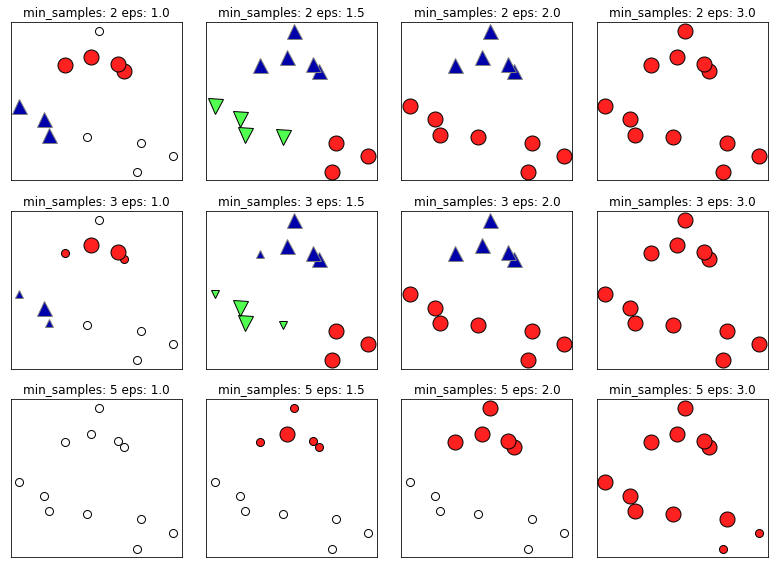

In [17]:
mglearn.plots.plot_dbscan()

- 様々なepsとmin_samplesに対するDBSCANによるクラスタリング結果
- epsを増やすとより多くの点がクラスタに含まれるようになる
- min_samplesを増やすとより多くの点がノイズとなる

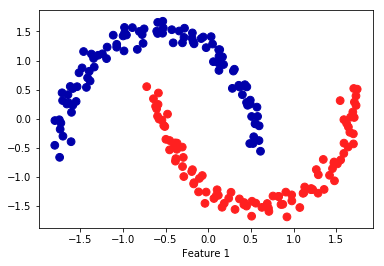

In [18]:
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# データを平均0分散1にスケール変換
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# クラスタリング結果をプロット
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")

クラスタリングアルゴリズムの比較と評価
---
- クラスタリングアルゴリズムは各アルゴリズムがどの程度うまく機能したかを判断し、各アルゴリズムの結果を比較することが難しい

### 正解データを用いたクラスタリングの評価
- クラスタリングアルゴリズムの出力を正解データクラスタリングと比較して評価するために用いられる指標がいくつかある
    - 調整ランド指数(adjusted rand index: ARI)
    - 正規化相互情報量(normalized mutual information: NMI)
    - これらはいずれも定量的な指標で最良の場合に１を、関係ないクラスタリングの場合に０をとる
        - ARIは負数になりえる

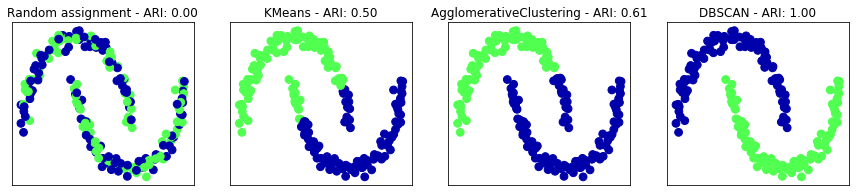

In [21]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# データを平均0、分散を1にスケール変換する scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                           subplot_kw={'xticks': (), 'yticks': ()})
# 利用するアルゴリズムのリストを作る
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
# 参照のためにランダムなクラスタ割り当てを作る
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# ランダムな割り当てをプロット
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1],  c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
    # クラスタ割り当てとクラスタセンタをプロット
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

- ARIの結果は直感的に理科しやすい 